**In this project, we want to use Mean Reversion(Pair Trading) Strategy to invest in two stocks**  


# First Step: Stock Selection
**We want to find two stocks that are positively correlated, and occasionally diverge then converge**
**To find the stocks, we choose two stocks from the same industry**  
**(Because they are in the same industry, it is likely the price grows similarly over time)**
### Selection Criteria 1: Strong Correlation

In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import yfinance as yf

def get_historical_Data(tickers):
    """This function returns a pd dataframe with all of the adjusted closing information"""
    data = pd.DataFrame()
    names = list()
    for i in tickers:
        data = pd.concat([data, pd.DataFrame(yf.download(i, start=datetime(2020, 4, 27), end=datetime(2021, 4, 27)).iloc[:,4])], axis = 1)
        names.append(i)
    data.columns = names
    return data

ticks = ["DPZ", "AAPL", "GOOG", "AMD", "GME", "SPY", "NFLX", "BA", "WMT","GS","XOM","NKE","BRK-B", "MSFT"] #Name of company (Dominos pizza)
d = get_historical_Data(ticks)
print(d.shape)
# Most Recent Data
d.tail()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

(252, 14)


,DPZ,AAPL,GOOG,AMD,GME,SPY,NFLX,BA,WMT,GS,XOM,NKE,BRK-B,MSFT
Date,,,,,,,,,,,,,,
2021-04-20,385.633118,130.995407,114.681503,79.269997,39.632500,395.553711,549.570007,234.059998,134.952652,309.218628,49.268330,123.477966,267.890015,252.084854
2021-04-21,382.484467,131.379211,114.664497,81.610001,39.627499,399.296570,508.899994,235.919998,135.345642,312.377075,49.901001,126.188240,272.209991,254.349350
2021-04-22,386.321014,129.843964,113.396004,79.059998,37.792500,395.649689,508.779999,234.330002,133.879059,308.258911,49.250504,125.488785,269.510010,251.020889
2021-04-23,385.303741,132.186203,115.764999,82.760002,37.794998,399.939423,505.549988,238.380005,134.099564,316.178558,49.517834,126.469963,271.980011,254.905731
2021-04-26,387.725708,132.579849,116.336998,85.410004,42.232498,400.774323,510.299988,241.440002,132.192032,320.063782,49.615849,127.839691,270.859985,255.296127


<Axes: >

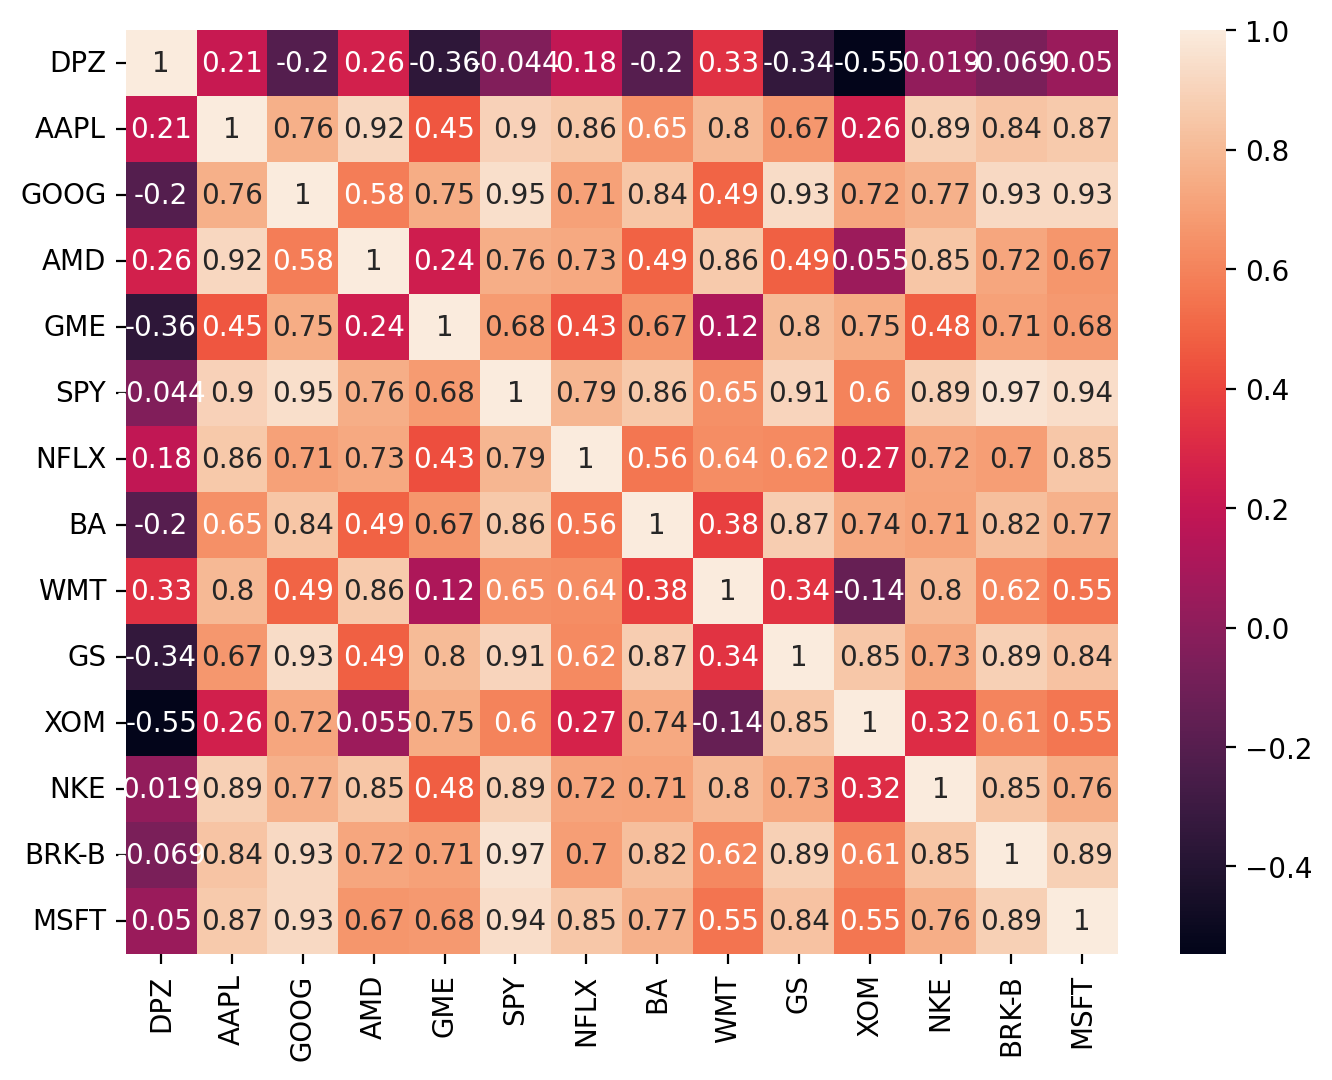

In [2]:
# Use correlation matrix to find stocks that are highly correlated
import seaborn as sn
from matplotlib.pyplot import figure
corr_matrix = d.corr()
figure(figsize=(8, 6), dpi=200)
sn.heatmap(corr_matrix, annot = True)

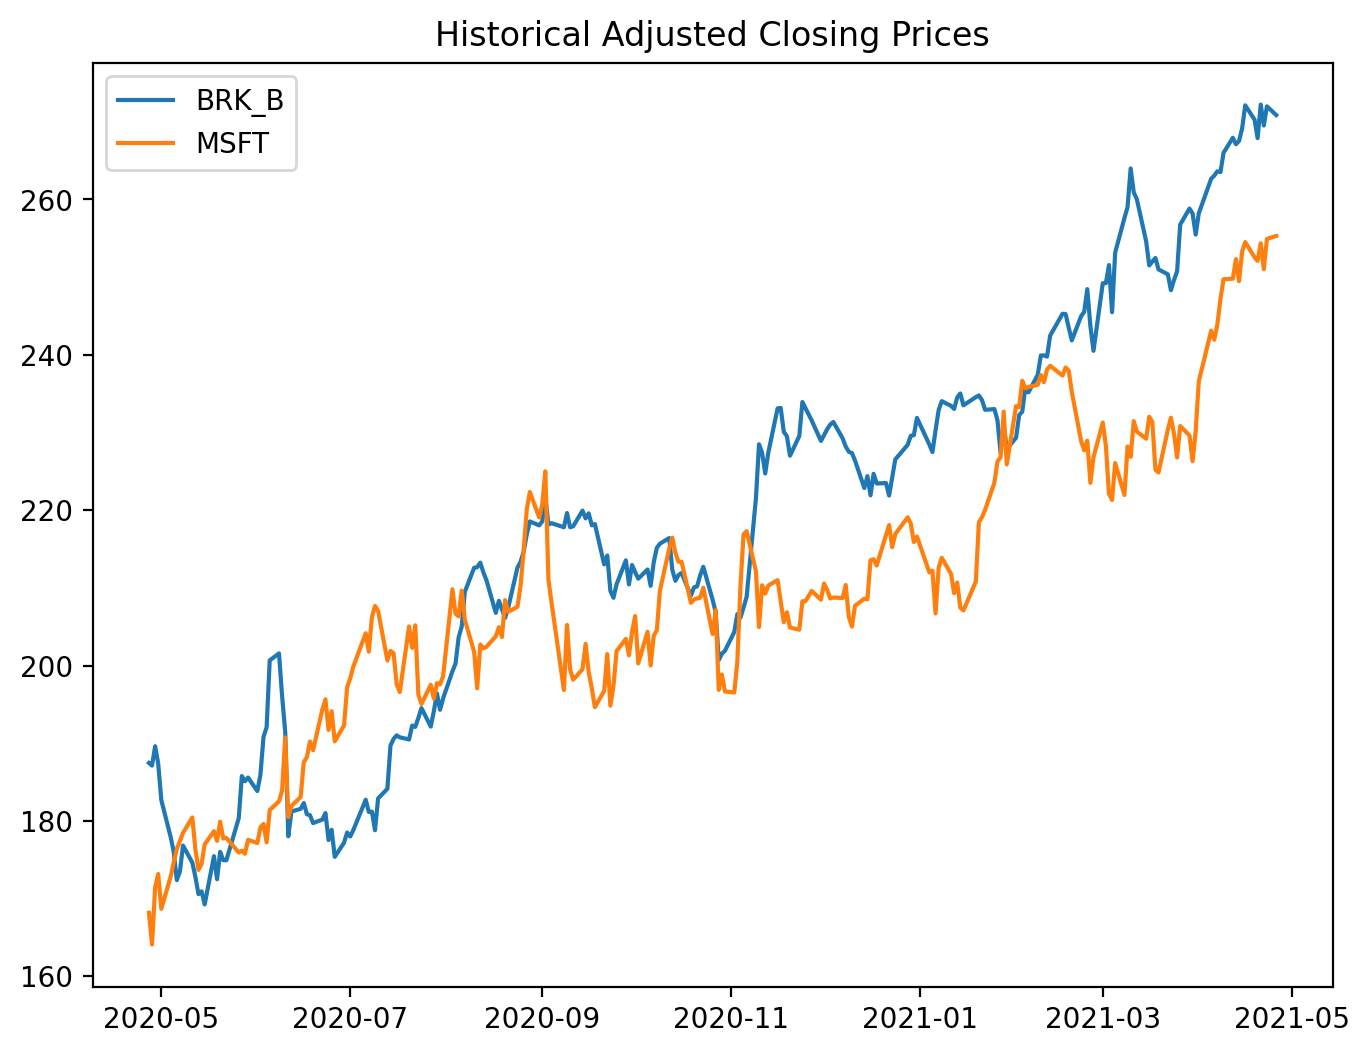

In [3]:
import matplotlib.pyplot as plt
figure(figsize=(8, 6), dpi=200)
BRK_B = d['BRK-B'] # Berkshire Hathaway
MSFT = d['MSFT'] # Microsoft
plt.plot(BRK_B, label = "BRK_B")
plt.plot(MSFT, label = "MSFT")
plt.title('Historical Adjusted Closing Prices')
plt.legend()

**from the graph, we can see prices of BRK_B and MSFT are strongly correlated, with divergence and convergence**  
**Therefore, we find the two stocks that are strongly correlated
### Selection Criteria 2: Stationary Ratio / Spread
**We want to use cointegration and ADF test to see if their price ratio / spread is stationary**

In [4]:
from statsmodels.tsa.stattools import adfuller

BRK_B_ADF = adfuller(BRK_B)
print('P value for the Augmented Dickey-Fuller Test is', BRK_B_ADF[1])
MSFT_ADF = adfuller(MSFT)
print('P value for the Augmented Dickey-Fuller Test is', MSFT_ADF[1])
Spread_ADF = adfuller(BRK_B - MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Spread_ADF[1])
Ratio_ADF = adfuller(BRK_B / MSFT)
print('P value for the Augmented Dickey-Fuller Test is', Ratio_ADF[1])
# Because the ADF test is below 0.05, we know the ratio is stationary

P value for the Augmented Dickey-Fuller Test is 0.8801178852560501
P value for the Augmented Dickey-Fuller Test is 0.6517641281541127
P value for the Augmented Dickey-Fuller Test is 0.04821546298686296
P value for the Augmented Dickey-Fuller Test is 0.022523847830818552


In [5]:
import statsmodels.tsa.stattools as ts 
result = ts.coint(BRK_B, MSFT)
cointegration_t_statistic = result[0]
p_val = result[1]
critical_values_test_statistic_at_1_5_10 = result[2]
print('We want the P val < 0.05 (meaning that cointegration exists)')
print('P value for the augmented Engle-Granger two-step cointegration test is', p_val)

# Cointegration test also shows approximately 0.05, meaning that the spread of two stock prices is stationary

We want the P val < 0.05 (meaning that cointegration exists)
P value for the augmented Engle-Granger two-step cointegration test is 0.05529833028911849


Text(0.5, 1.0, 'Price Ratio between BRK and MSFT')

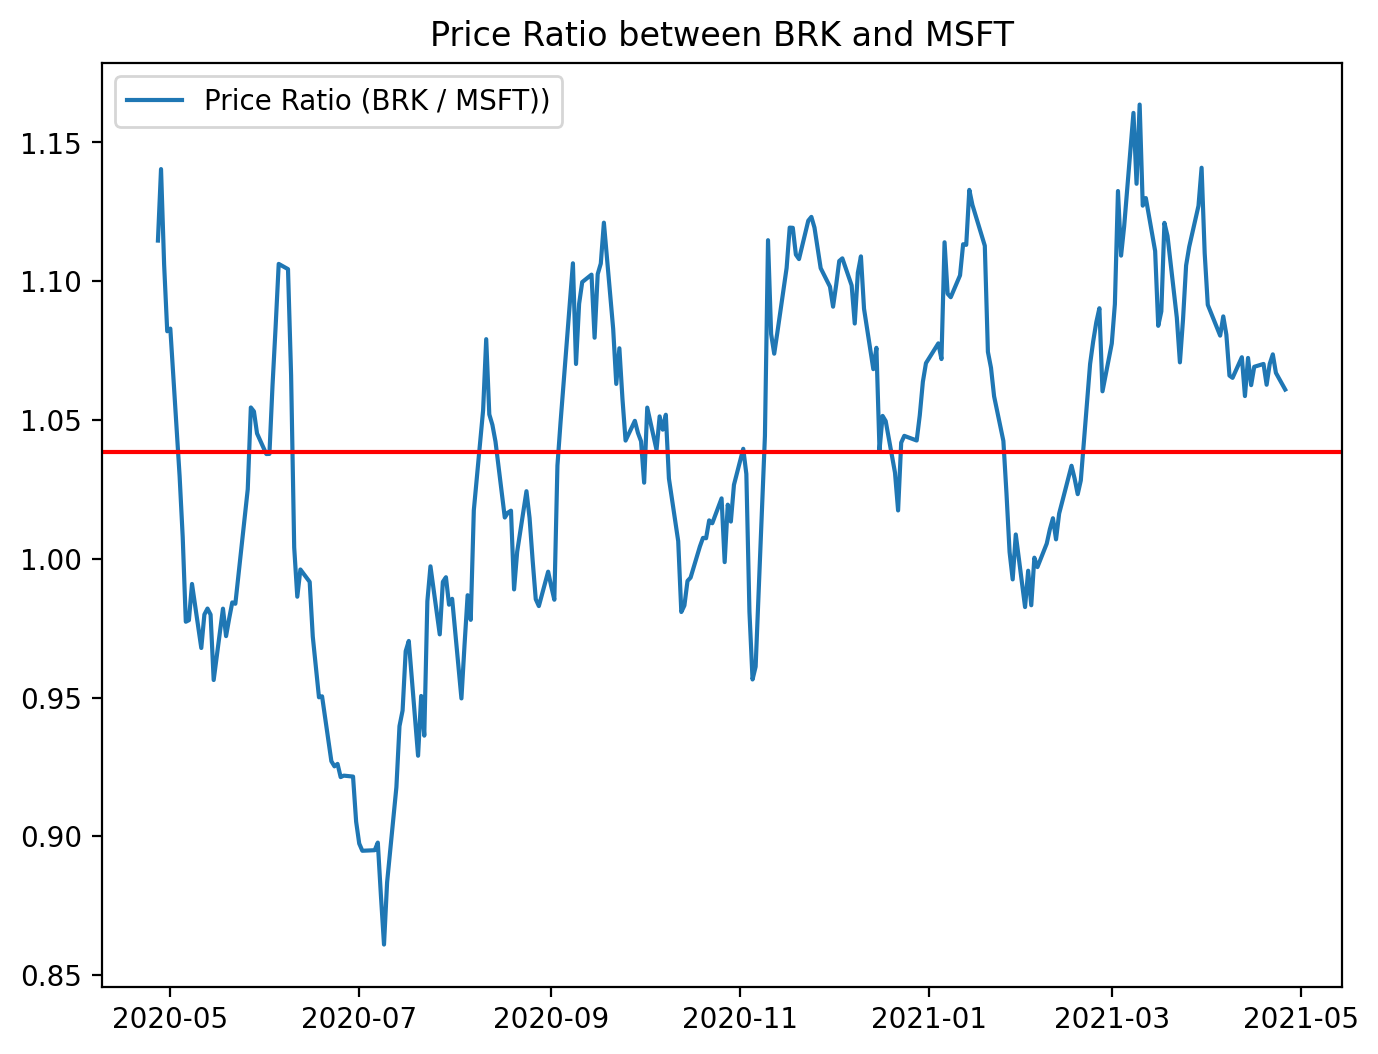

In [6]:
# Below is a visualization of stationary ration between two time series
figure(figsize=(8, 6), dpi=200)
ratio = BRK_B / MSFT
plt.plot(ratio, label = 'Price Ratio (BRK / MSFT))')
plt.axhline(ratio.mean(), color='red')
plt.legend()
plt.title("Price Ratio between BRK and MSFT")

# Step 2: Determine Boundaries for Long/Short the Pair
**When the price ratio exceed the upper boundary, we know the price ratio is significantly deviate from the stationary value.**  
**Because the raio is stationary, we know it is very likely that the ratio will drop, which means that BRK's price will decline and MSFT's price will increase.**  
**Therefore we short BRK and long MSFT**  

**The reverse is similar. When the price ratio is below the lower bound,**  
**We know it is very likely that the ratio will then rebound, so BRK's price will increase and MSFT's price will decrease**  
**Therefore, we long BRK and short MSFT**

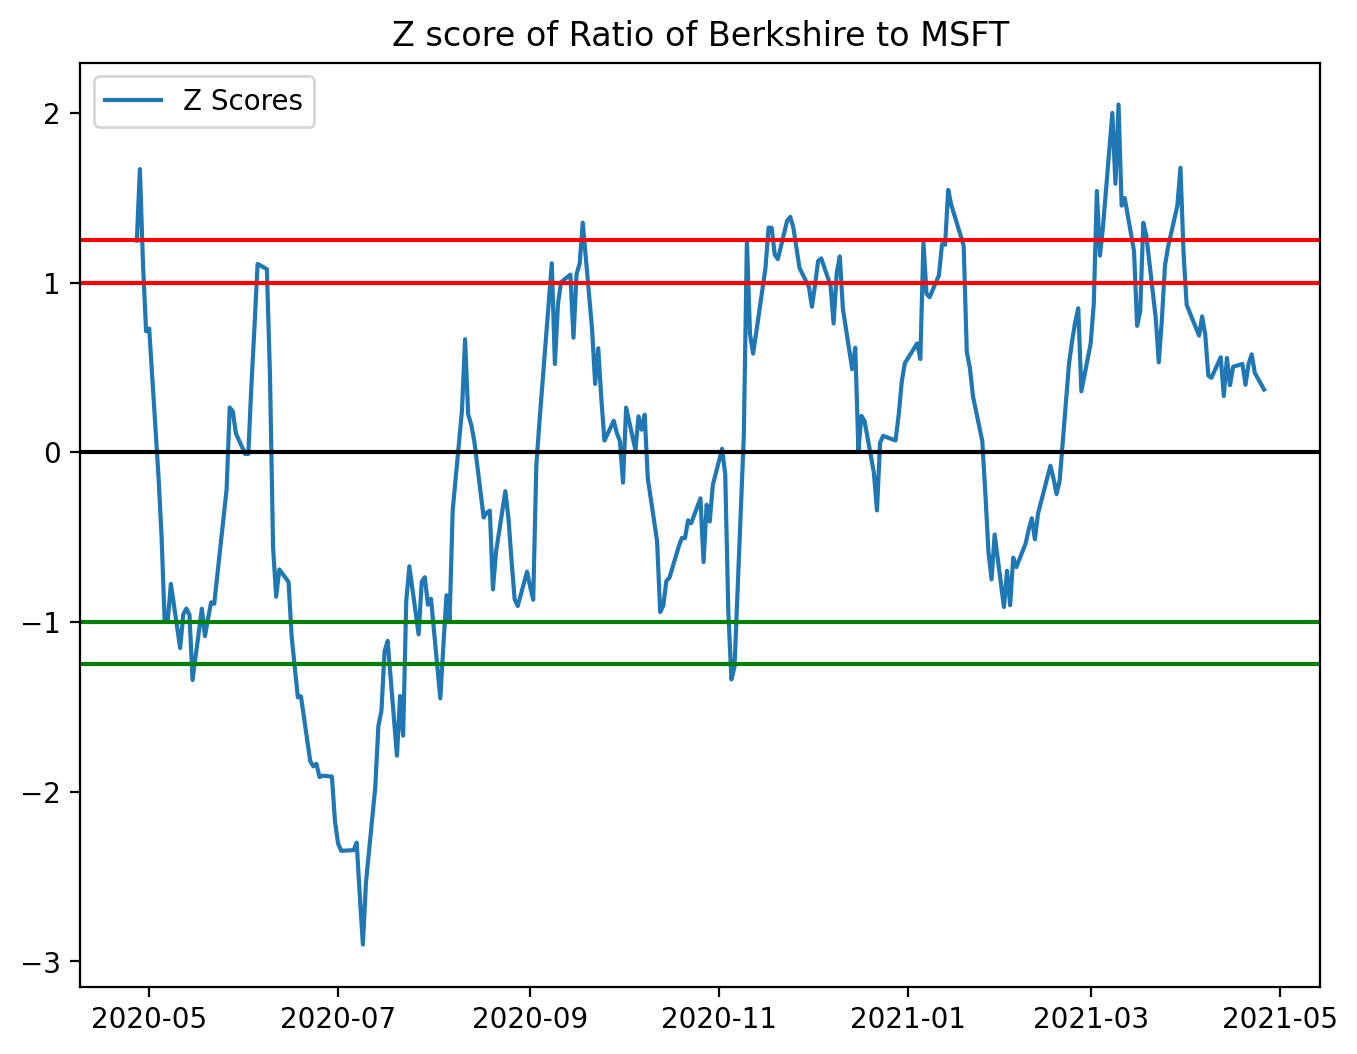

In [8]:
figure(figsize=(8, 6), dpi=200)
df_zscore = (ratio - ratio.mean())/ratio.std()
plt.plot(df_zscore, label = "Z Scores")
plt.axhline(df_zscore.mean(), color = 'black')
plt.axhline(1.0, color='red') # Setting the upper and lower bounds to be the z score of 1 and -1 (1/-1 standard deviation)
plt.axhline(1.25, color='red') # 95% of our data will lie between these bounds.
plt.axhline(-1.0, color='green') # 68% of our data will lie between these bounds.
plt.axhline(-1.25, color='green') # 95% of our data will lie between these bounds.
plt.legend(loc = 'best')
plt.title('Z score of Ratio of Berkshire to MSFT')
plt.show()

# Step 3: Find 'Signal' to Trade
**We use 5-day moving average to generate price of given day, therefore returning our predicted price ratio**  
**Comparing the ratio with our boundary, we make decision on whether to long or short the pair**  

**Note: we don't use threshold-based approach (take action based on today's price rather than moving average) because prices can fluctuate widely on a day-to-day basis due to short-term market sentiment, news, or random events. Moving average helps us to average out the minor fluctuations**

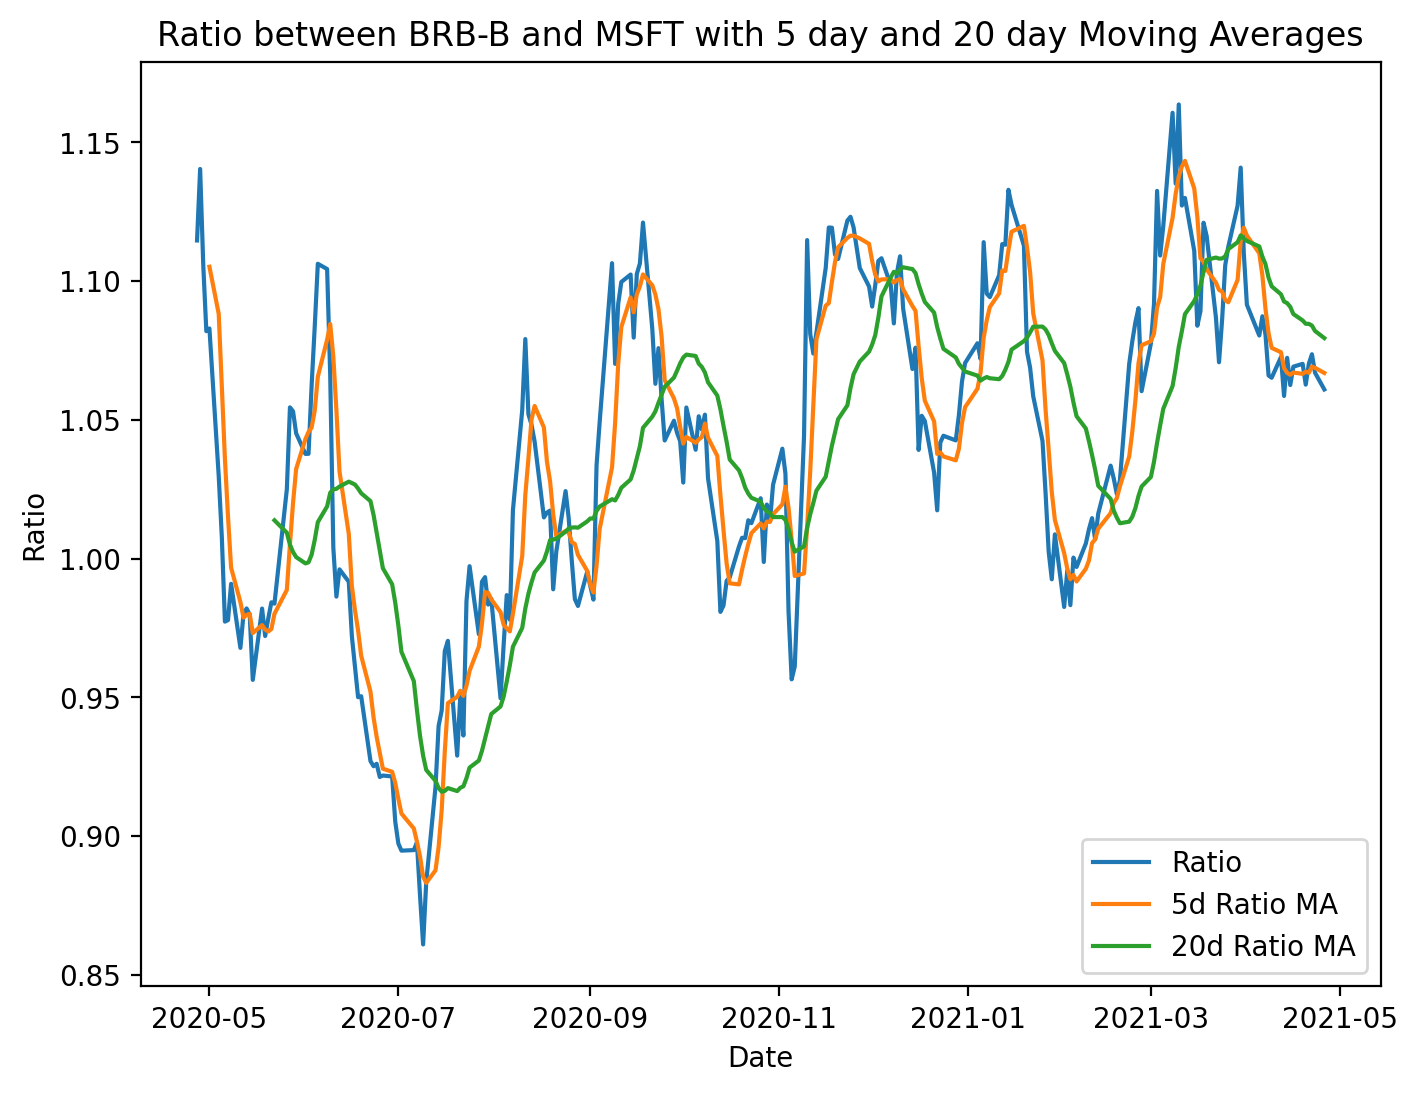

In [23]:
figure(figsize=(8, 6), dpi=200)
ratios_mavg5 = ratio.rolling(window=5, center=False).mean()
ratios_mavg20 = ratio.rolling(window=20, center=False).mean()
std_20 = ratio.rolling(window=20, center=False).std()
zscore_20_5 = (ratios_mavg5 - ratios_mavg20)/std_20
plt.plot(ratio.index, ratio.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg20.index, ratios_mavg20.values)
plt.legend(['Ratio', '5d Ratio MA', '20d Ratio MA'])
plt.xlabel('Date')
plt.ylabel('Ratio')
plt.title('Ratio between BRB-B and MSFT with 5 day and 20 day Moving Averages')
plt.show()

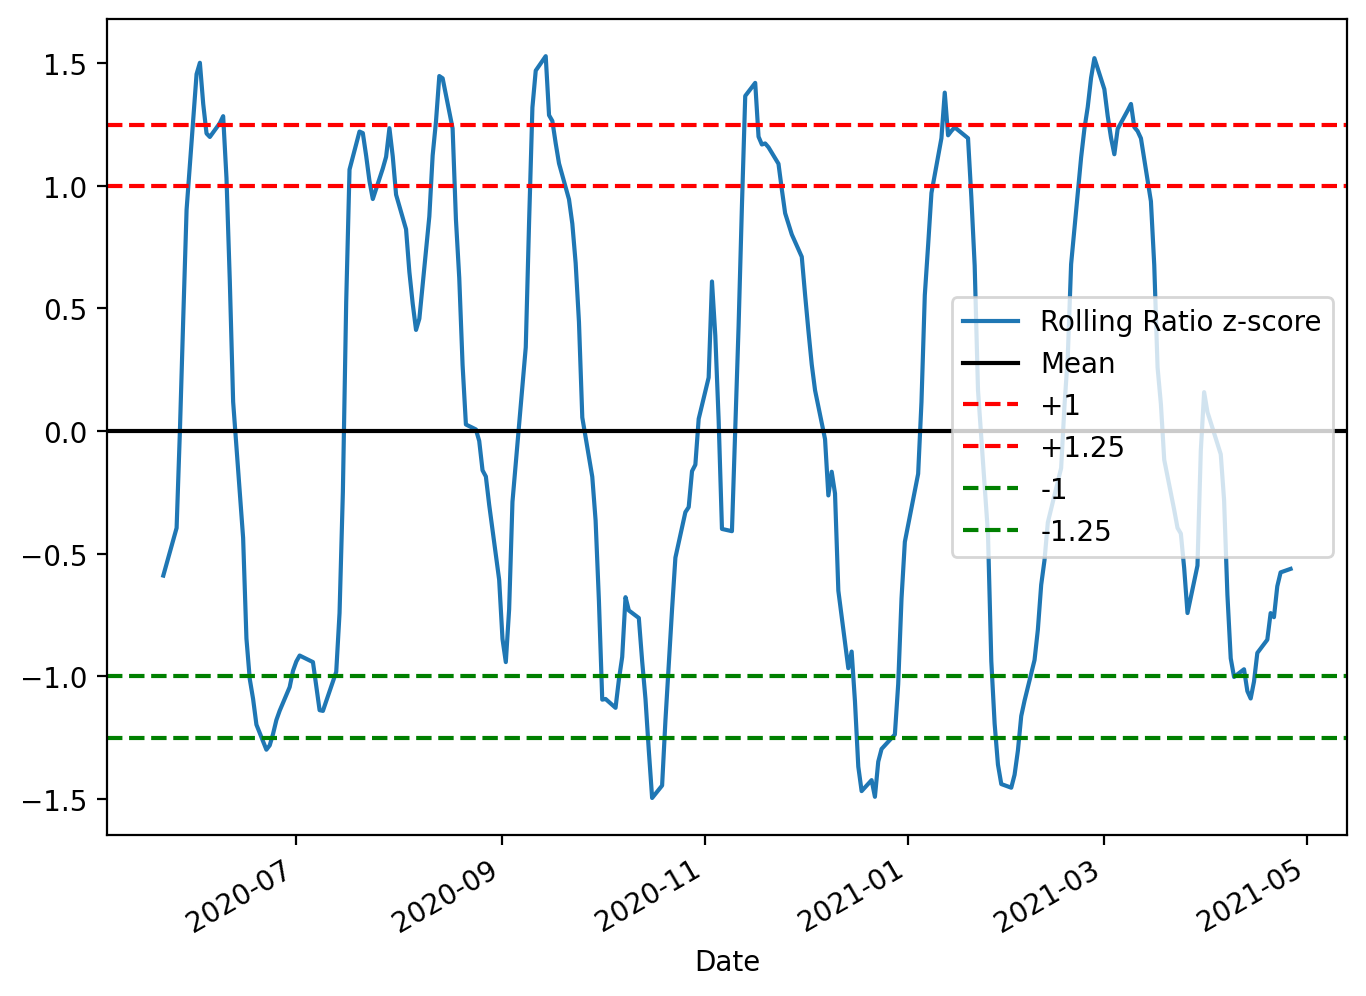

In [24]:
# Set up the boundary
figure(figsize=(8, 6), dpi=200)
zscore_20_5.plot()
plt.axhline(0, color='black')
plt.axhline(1, color='red', linestyle='--')
plt.axhline(1.25, color='red', linestyle='--')
plt.axhline(-1, color='green', linestyle='--')
plt.axhline(-1.25, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-score', 'Mean', '+1','+1.25','-1','-1.25'])
plt.show()

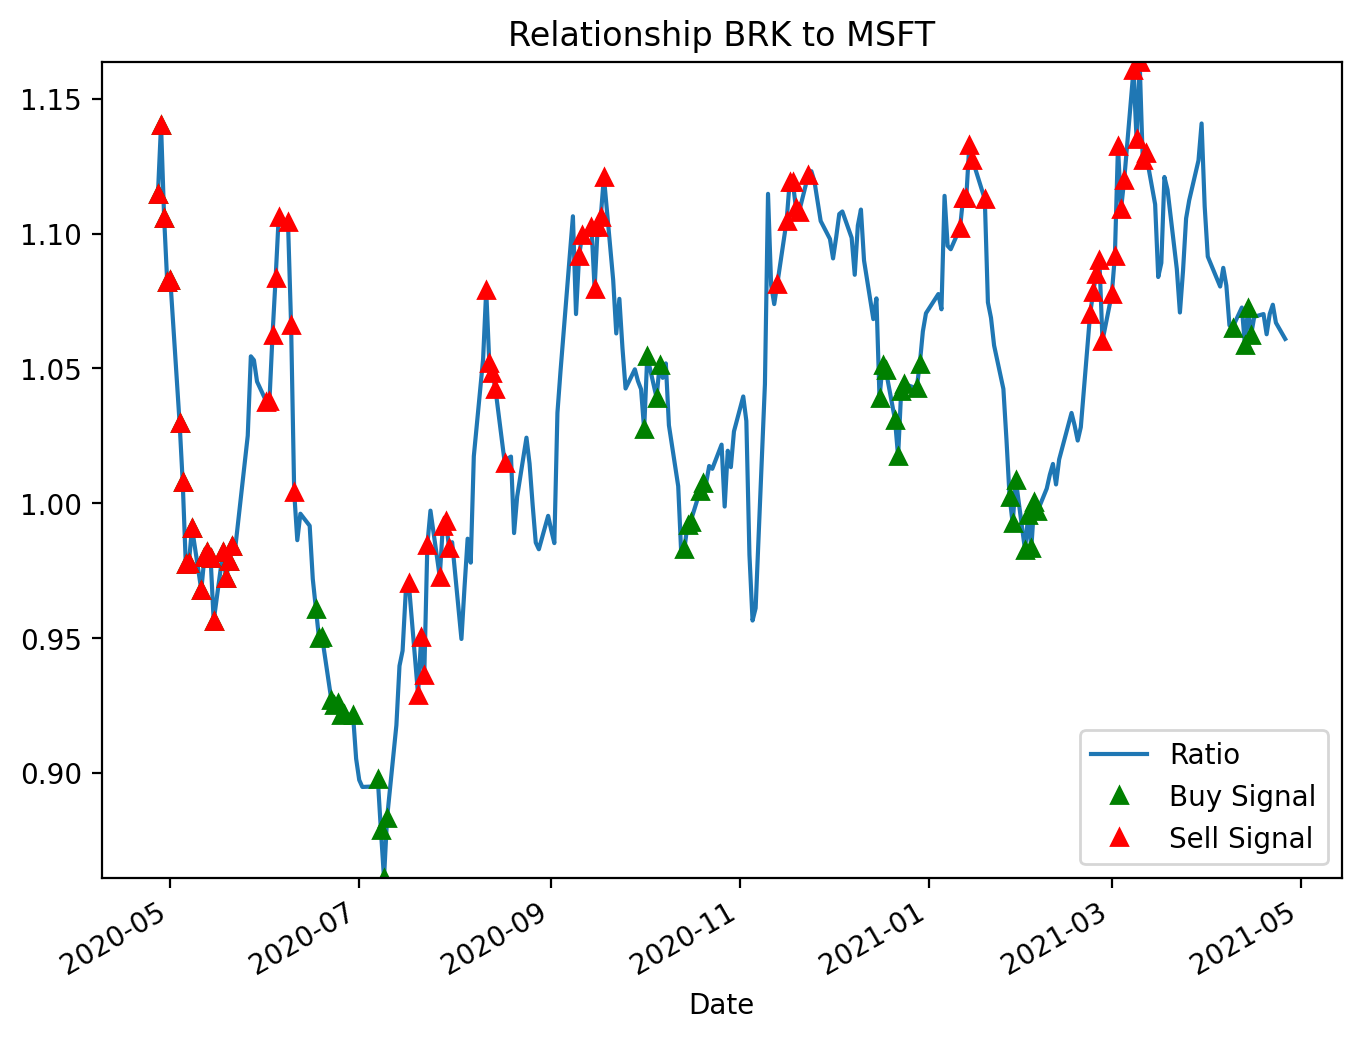

In [25]:
figure(figsize=(8, 6), dpi=200)
ratio.plot()
buy = ratio.copy()
sell = ratio.copy()
buy[zscore_20_5>-1] = 0
sell[zscore_20_5<1] = 0
buy.plot(color='g', linestyle='None', marker='^')
sell.plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratio.min(), ratio.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.title('Relationship BRK to MSFT')
plt.show()

## References

This project was inspired by and references the following sources:

- The main structure and strategies were adapted from the YouTube video "Algorithmic Trading Using Python - Full Course" by freeCodeCamp.org. The specific video can be found at [this link](https://www.youtube.com/watch?v=f73ItMWO4z8).

- Additional concepts and techniques were based on publicly available repositories and various discussions within the trading community on forums such as Stack Overflow and Reddit.

I have adapted and expanded upon these resources to fit the specific goals of my project.